### Rolling cadence 

Whether or not, and how, to add rolling cadence is an important question. 

Let's look at some of the science impacts.

The new v2.0 baseline, `baseline_v2.0_10yrs` and its successor `baseline_v2.1_10yrs` include a 2-band rolling cadence at 90% strength in the low-dust WFD region. "2-band" means 1/2 sky active during the rolling periods -- the actual "active" 1/2 of the sky consists of 2 regions, north and south, to distribute follow-up requirements over both northern and southern hemispheres. 

In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
import rubin_sim.maf as maf

In [2]:
families = maf.archive.get_family_descriptions('runs_v2.2.json')
family_list = families.index.values
summary_source = 'summary_2022_10_19.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)
metrics_source = 'metric_sets.json'
metric_set = maf.get_metric_sets(metrics_source)

Let's just visualize what the rolling cadence means, briefly, by mapping the visits occuring during 1 year

In [3]:
fam = ['rolling v2']
baseline_run = families.loc['rolling v2', 'reference']
print(baseline_run)
these_runs = np.concatenate([[baseline_run], families.explode('run').loc[fam, 'run']])
lines = np.array([1, 2, 4, 6, 9, 12, 15])

baseline_v2.2_10yrs


In [4]:
maf.describe_families(families.loc[fam, :],
                        summary=summaries,
                        table_metric_set=metric_set.loc["short description"],
                        plot_metric_set=None,
                        baseline_run=families.loc['rolling v2', "reference"],)

---
**rolling v2** : This updates on the rolling family covers a more modest variety of rolling cadence variations. The strength of rolling is varied from rw=50,80 or 90%, and 2 and 3 band versions are considered (as well as no rolling). Additional simulations with "const" in the name add a variety of non-rolling years interspersed into the rolling cadence years.   
**version**: 2.2  
**runs**:  


,brief,Area with >825 visits/pointing (fO_Area),Unextincted area i>25.9,Nvisits total,Median Nvis over top 18k (fO_Nv Med),Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band
run,,,,,,,,,,,
noroll_v2.2_10yrs,No rolling cadence,10156.29,17317.15,2071905.0,828.0,48.0,66.0,177.0,181.0,160.0,165.0
rolling_ns2_strength0.50v2.2_10yrs,2 band rolling cadence at 0.50 strength.,10356.88,17274.34,2073211.0,829.0,48.0,67.0,177.0,182.0,160.0,166.0
rolling_ns3_strength0.50v2.2_10yrs,3 band rolling cadence at 0.50 strength.,10393.81,17280.22,2073781.0,829.0,48.0,67.0,178.0,182.0,160.0,166.0
rolling_ns2_strength0.80v2.2_10yrs,2 band rolling cadence at 0.80 strength.,10560.83,17241.61,2074478.0,830.0,48.0,67.0,177.0,182.0,160.0,166.0
rolling_ns3_strength0.80v2.2_10yrs,3 band rolling cadence at 0.80 strength.,10936.00,17299.52,2077231.0,832.0,48.0,67.0,178.0,182.0,160.0,167.0
rolling_ns2_strength0.90v2.2_10yrs,2 band rolling cadence at 0.90 strength.,10569.22,17237.41,2074975.0,830.0,48.0,67.0,177.0,182.0,160.0,166.0
rolling_flipped_v2.2_10yrs,Flipped order 2-band 0.9 strength rolling cadence,10481.94,17196.29,2075364.0,830.0,48.0,66.0,178.0,182.0,160.0,166.0
rolling_ns3_strength0.90v2.2_10yrs,3 band rolling cadence at 0.90 strength.,11031.68,17177.82,2078058.0,832.0,47.0,67.0,178.0,182.0,160.0,167.0
roll_with_const_roll_indx0_v2.2_10yrs,"2 band, 0.9 strength rolling cadence with constant years interspersed. Full non-rolling season at start.",10763.10,17292.81,2074872.0,831.0,47.0,66.0,178.0,182.0,160.0,167.0


(None, None)

In [5]:
# list the metric sets
msets = list(metric_set.groupby('metric set').first().index)
msets = [m for m in msets if 'DDF' not in m]

for k in msets:
    print(k, len(metric_set.loc[k]))
    # Check that the metrics are correctly named and in the summary file
    summaries.loc[:, metric_set.loc[k]['metric']]

AGN N QSO 6
AGN SF 12
AGN short 5
AGN timelag 12
DESC WFD 10
GP filters 12
GP footprint 6
GP season 6
GP visit 6
N Visits 9
SCOC 22
SL TDC 6
SRD 5
SSO N Objs 6
SSO discovery 14
SSO discovery options 22
SSO fraction 3 bands 14
SSO fraction 4 bands 14
SSO fraction 5 bands 14
SSO fraction 6 bands 14
SSO lightcurve inversion 8
Stars 9
TVS KNe 7
TVS KNe short 3
TVS PeriodModulation 8
TVS PeriodicDetect 6
TVS Presto 2
TVS TDE 5
TVS Tgaps 12
TVS XRB 3
TVS anomalies 5
TVS microlensing all 17
TVS microlensing short 4
TVS short 6
WFD Depths 18
cadence 8
galaxies 8
plot areas 5
radar 11
short description 10


First we'd like to just check if rolling cadence impacts the number of visits per pointing or the depths. 

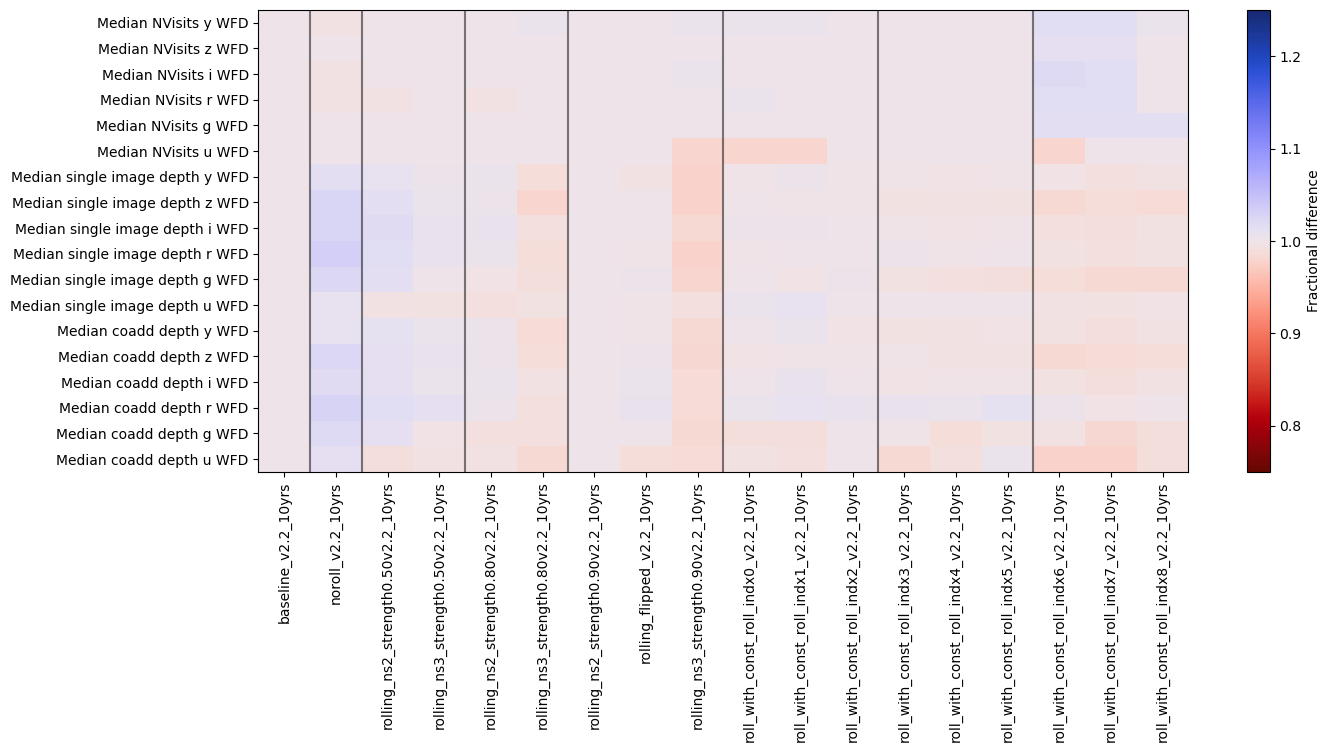

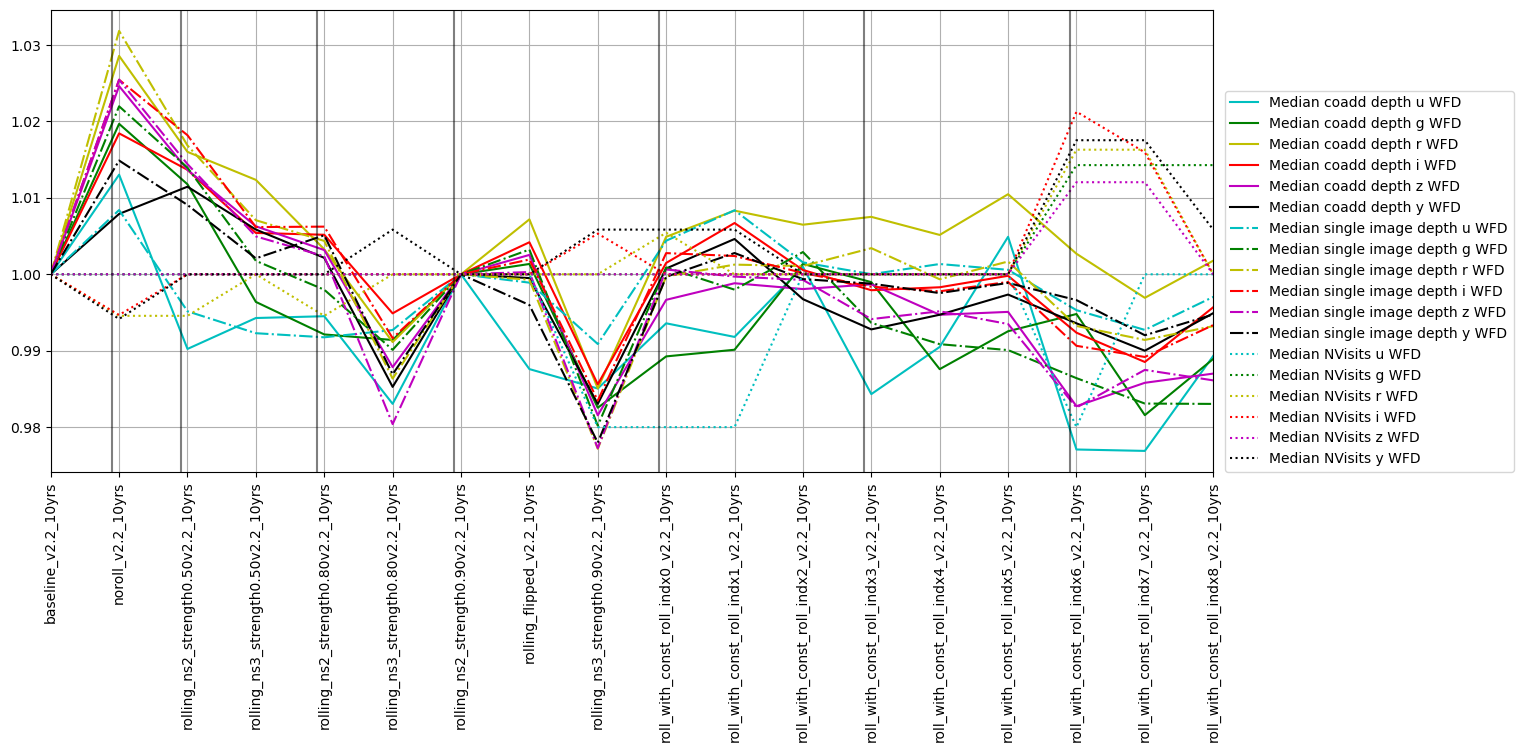

In [6]:
k = 'WFD Depths'

# Plot two versions of the figures
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=metric_set.loc[k]['short_name'],
                                   metric_set=metric_set.loc[k],
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                              baseline_run=baseline_run,
                              metric_set=metric_set.loc[k],
                              metric_label_map=metric_set.loc[k]['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
for l in lines:
    ax.axvline(l-0.1, color='k', alpha=0.5)

Again we see very little difference in the number of visits per pointing or the single visit depth per pointing, and so little changes in the coadded depths either. 
There is a *slight* improvement in the single visit depth with no rolling or less strong rolling, and this continues into 2 band rolling (compared to 3 band rolling). This is likely because rolling cadence restricts the amount of sky that is desirable to observe in a given night, so there is less "space" to optimize the depth in each visit. 3 band rolling restricts the observing choices more strongly than 2 band rolling, just as 2 band rolling restricts the choices more strongly than no rolling at all. 

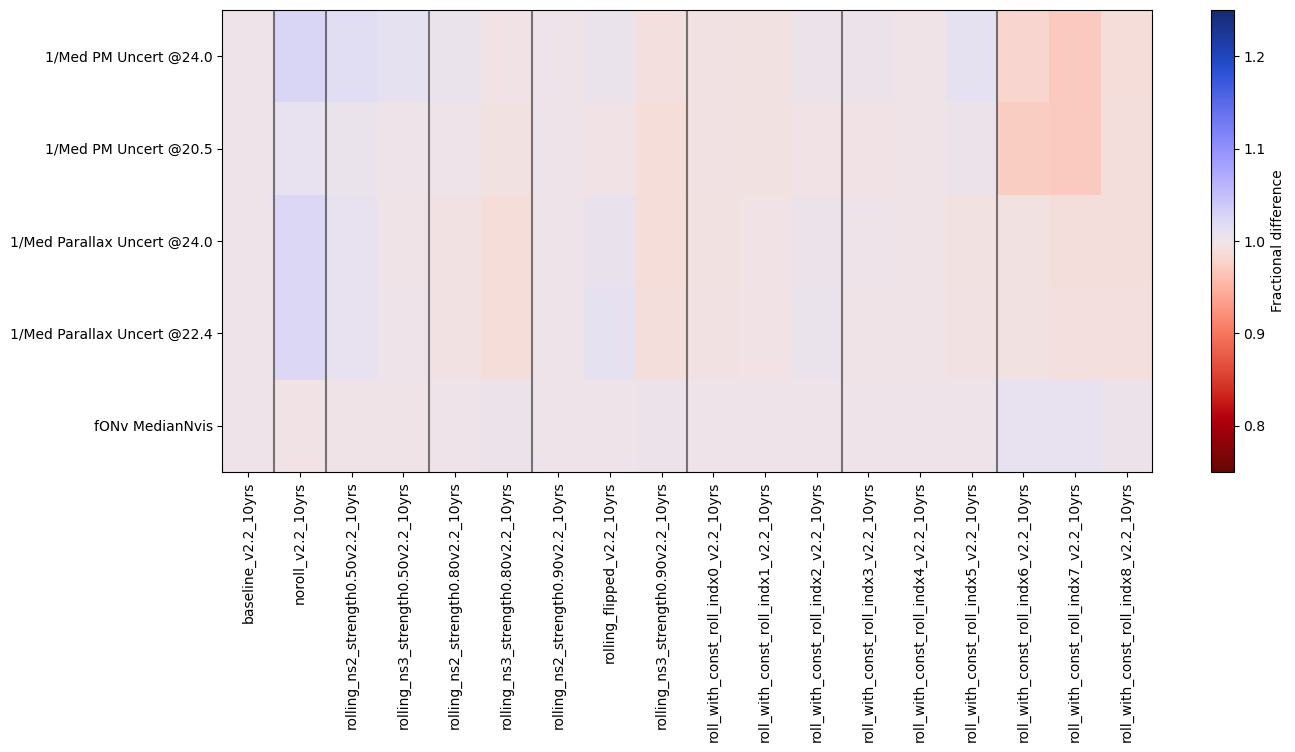

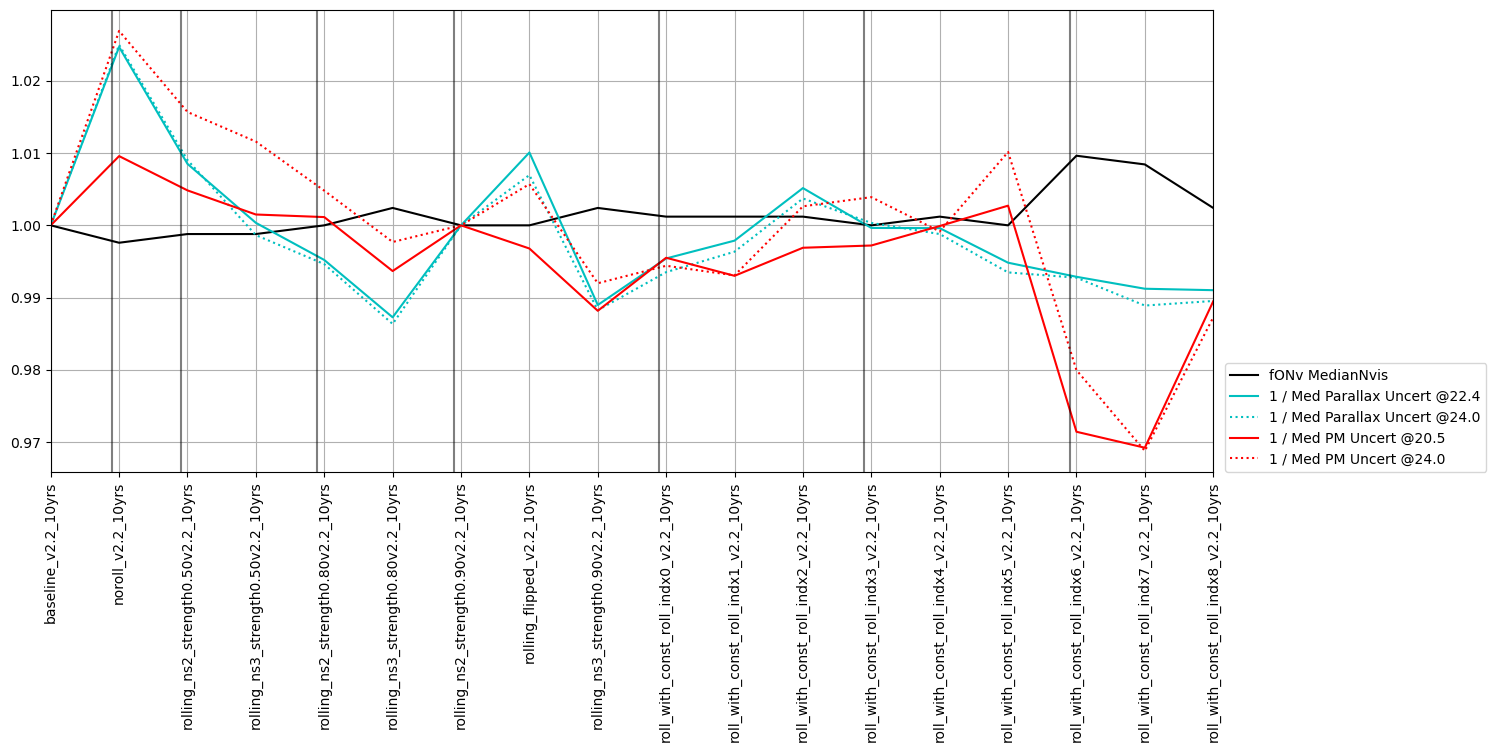

In [7]:
## SRD metrics 

k = 'SRD'

# Plot two versions of the figures
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=metric_set.loc[k]['short_name'],
                                   metric_set=metric_set.loc[k],
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                              baseline_run=baseline_run,
                              metric_set=metric_set.loc[k],
                              metric_label_map=metric_set.loc[k]['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
for l in lines:
    ax.axvline(l-0.1, color='k', alpha=0.5)

Again no strong differences here, although SRD metrics related to astrometry fare slightly better (but only by about 2%) with less strong or no rolling cadence. Astrometry metrics are related to long cadence effects and also single visit depth, so this is consistent with the depth plot above.. 

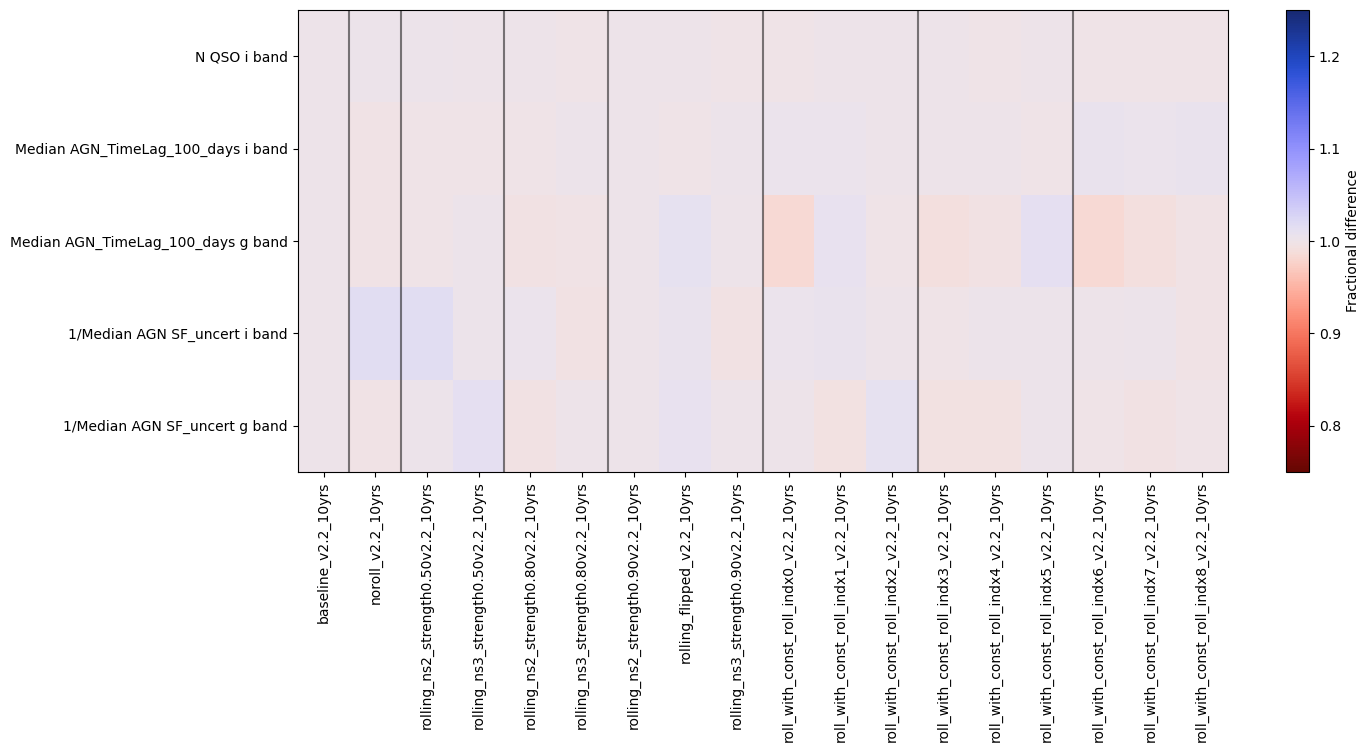

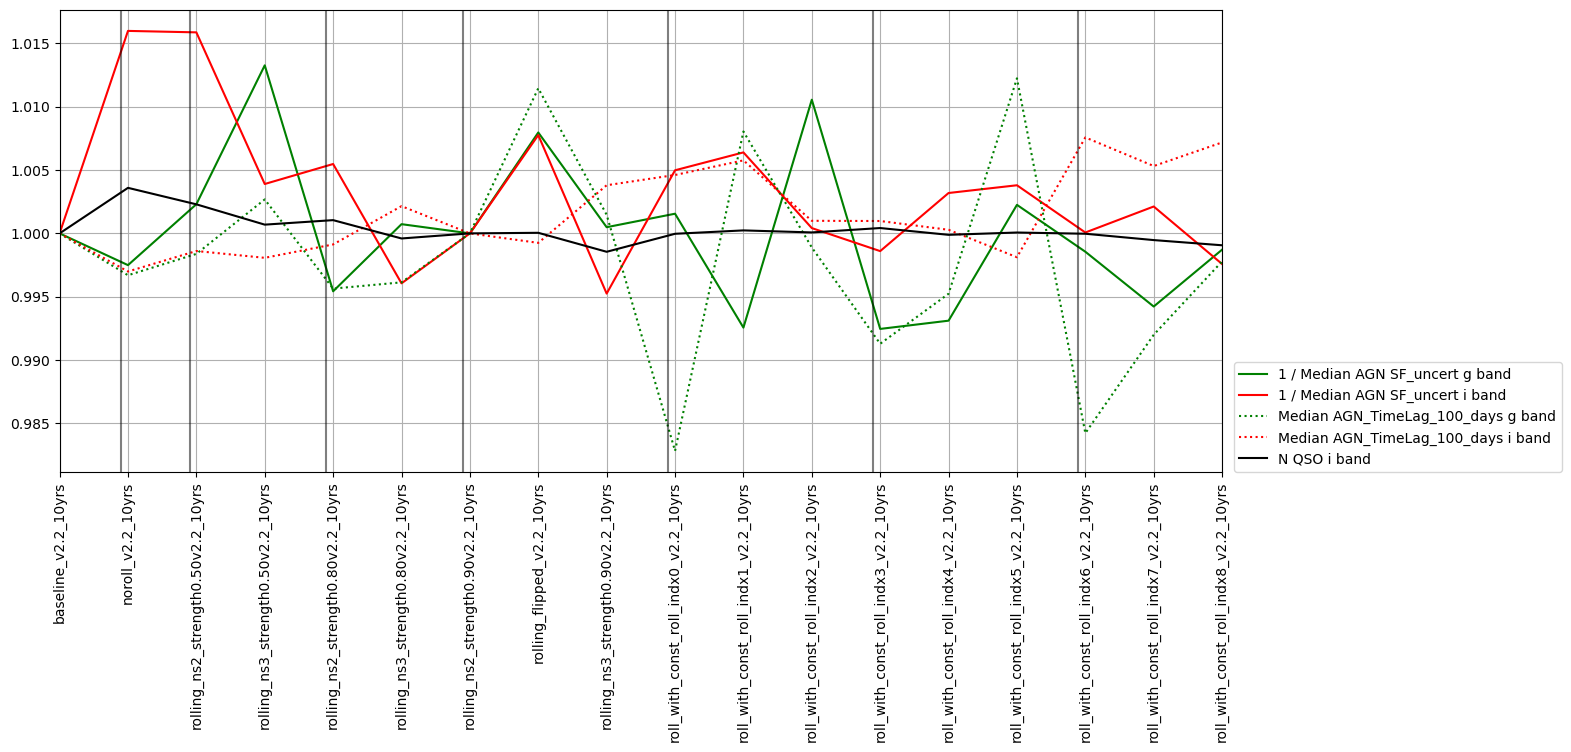

In [8]:
# AGN metrics
k_sets = ['AGN short']

msub = metric_set.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

for k in k_sets:
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value',
                                 shade_fraction=0)
    ylims = ax.get_ylim()
    ax.set_ylim(max(0.2, ylims[0]), min(2, ylims[1]))
    fig.set_figwidth(15)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.1, color='k', alpha=0.5)

The metrics for AGN include a count of the number of QSO (NQSO), and two cadence-dependent measurements. The AGN SF Uncertainty attempts to estimate the uncertainty on any measured Structure Function by looking at the distribution of observations over a logarithmic set of time bins; the timeLags metric evaluates how many intervals of 100 or 5 days (the 'time lag') are Nyquist sampled.

Within the bounds of these versions of rolling cadence, there is not a strong difference in these metrics. 

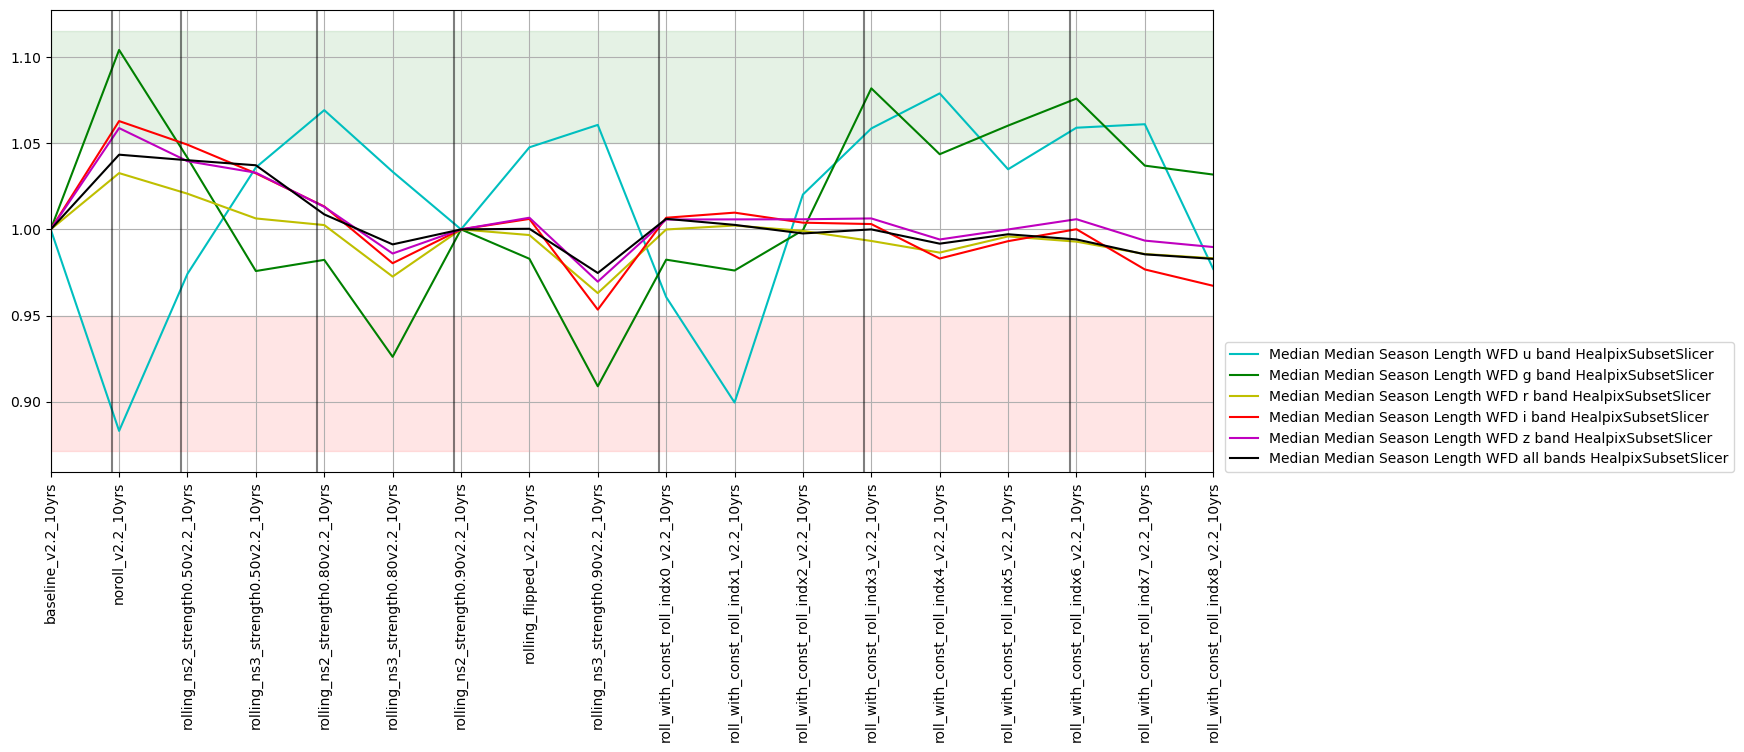

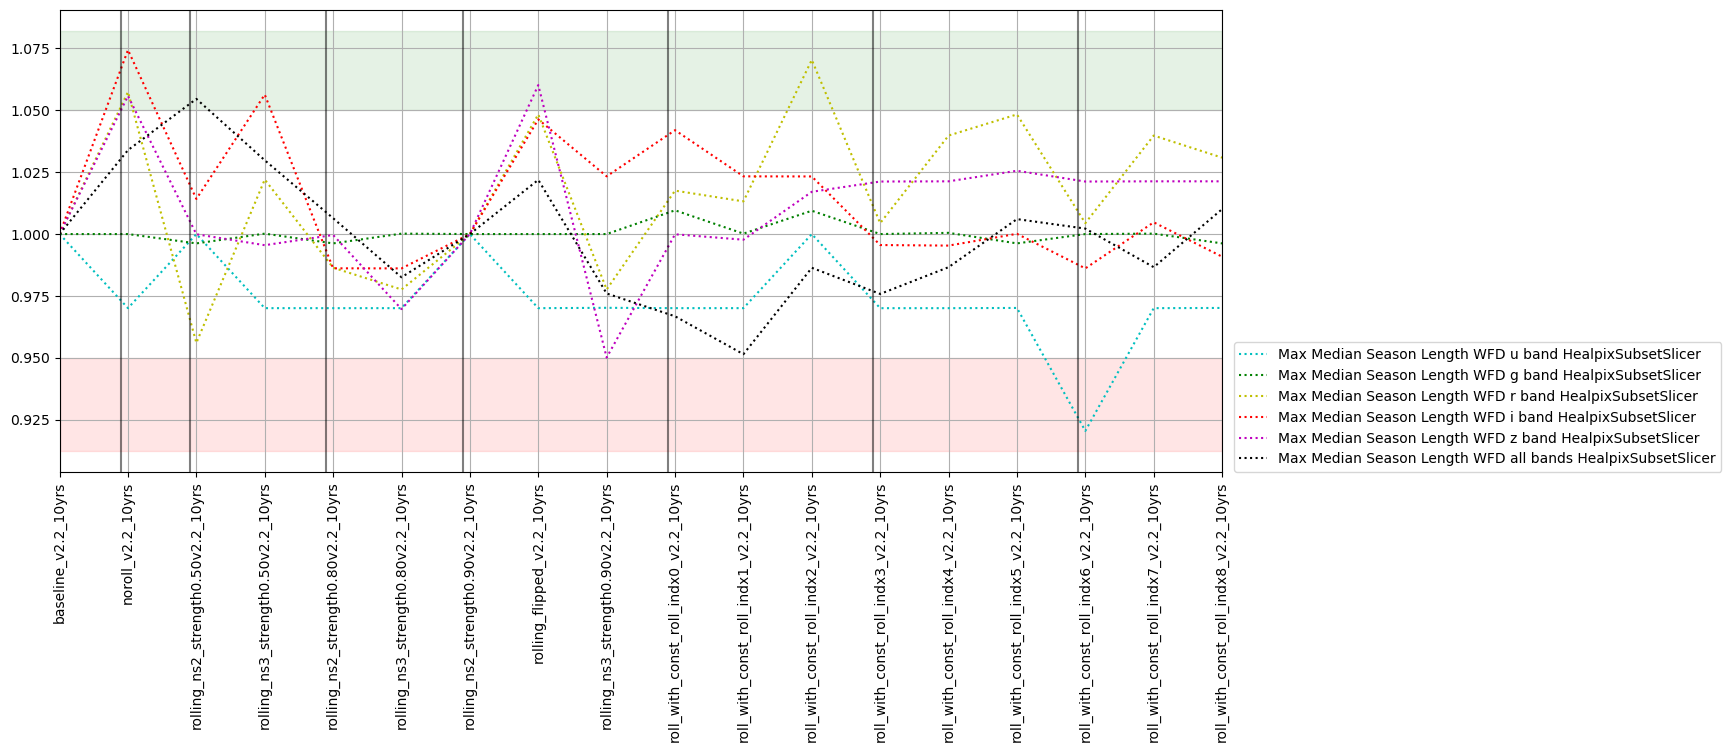

In [9]:
# Franz asked for the season length -
metrics = []
for f in ['u', 'g', 'r', 'i', 'z', 'all']:
    metrics += [m for m in summaries if 'Season' in m and 'WFD' in m and 'Median Median' in m and f' {f} ' in m]
msub = maf.create_metric_set_df('seasons', 
                                metrics = metrics, 
                                style = ['c-', 'g-', 'y-', 'r-', 'm-', 'k-'])
    
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']], 
                              baseline_run=baseline_run,
                              metric_set=msub,
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
for l in lines:
    ax.axvline(l-0.1, color='k', alpha=0.5)
    
    
metrics = []
for f in ['u', 'g', 'r', 'i', 'z', 'all']:
    metrics += [m for m in summaries if 'Season' in m and 'WFD' in m and 'Max Median' in m and f' {f} ' in m]
msub = maf.create_metric_set_df('seasons', 
                                metrics = metrics, 
                                style = ['c:', 'g:', 'y:', 'r:', 'm:', 'k:'])
    
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']], 
                              baseline_run=baseline_run,
                              metric_set=msub,
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
for l in lines:
    ax.axvline(l-0.1, color='k', alpha=0.5)

I suggest that this says there is only a small impact on the season length with rolling cadence and that most of this impact is related to 3 band rolling cadence (which results in slightly shorter median season lengths in all bands except u). 
I'm not entirely clear why no rolling (or more frequent non rolling years, such as the high number 'const indx' runs) extend the median season length, but this does seem to happen. 

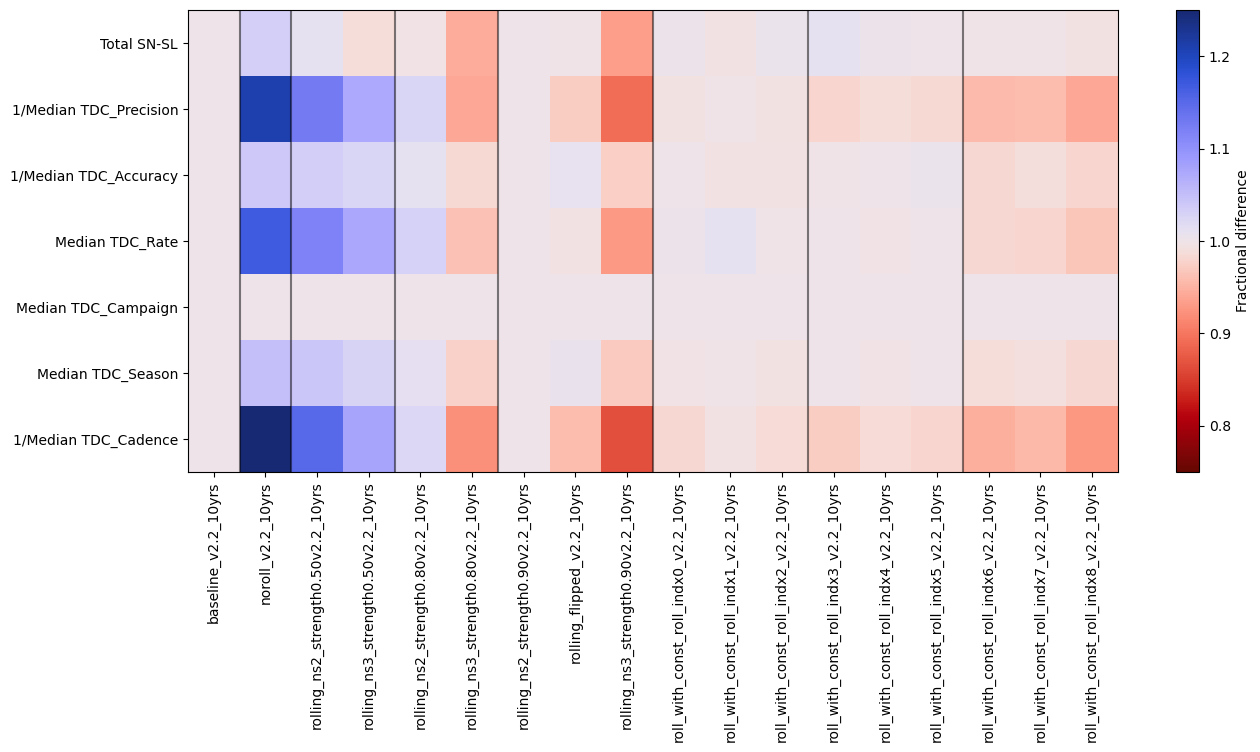

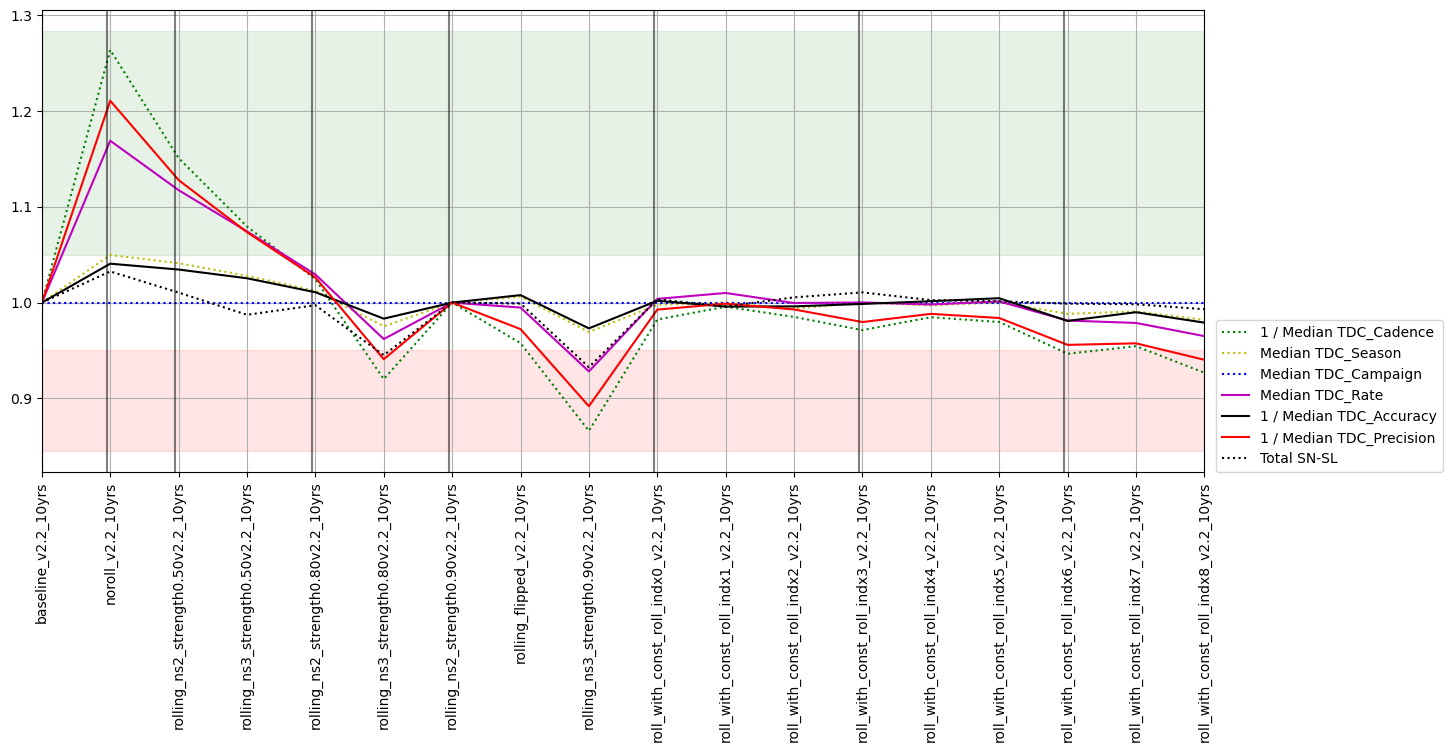

In [10]:
# StrongLensing metrics

k_sets = [k for k in msets if k.startswith('SL')]

msub = metric_set.loc[k_sets].reset_index('metric set')
# Add the strong lensed supernova metric
msub = pd.concat([msub, 
                  metric_set.loc['DESC WFD'].query('metric.str.contains("SNSL")', engine='python')])

fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)


fig, ax = maf.plot_run_metric(summaries.loc[these_runs, msub['metric']], 
                              baseline_run=baseline_run,
                              metric_set=msub,
                              metric_label_map=msub['short_name'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(15)
#ax.set_ylim(0.5, 1.5)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
for l in lines:
    ax.axvline(l-0.05, color='k', alpha=0.5)

The SNSL metrics previously argued against rolling cadence, and after conversations with the strong lensing collaboration, even though this *could* be an artifact of the metric (due to taking means and medians across multiple years within the calculation), this preference does correlate with current collaboration thinking on survey strategy preferences. 

The point of the SL collaboration is that the events are rare and need followup over multiple years. This argues for more coverage at all times, while dropping to lower coverage means that the event in question can truly become 'lost'. This argues for consistent coverage such as in no rolling. The dips with 3 band rolling cadence are consistent with this desire for more even coverage over time. 

SSO discovery
SSO lightcurve inversion


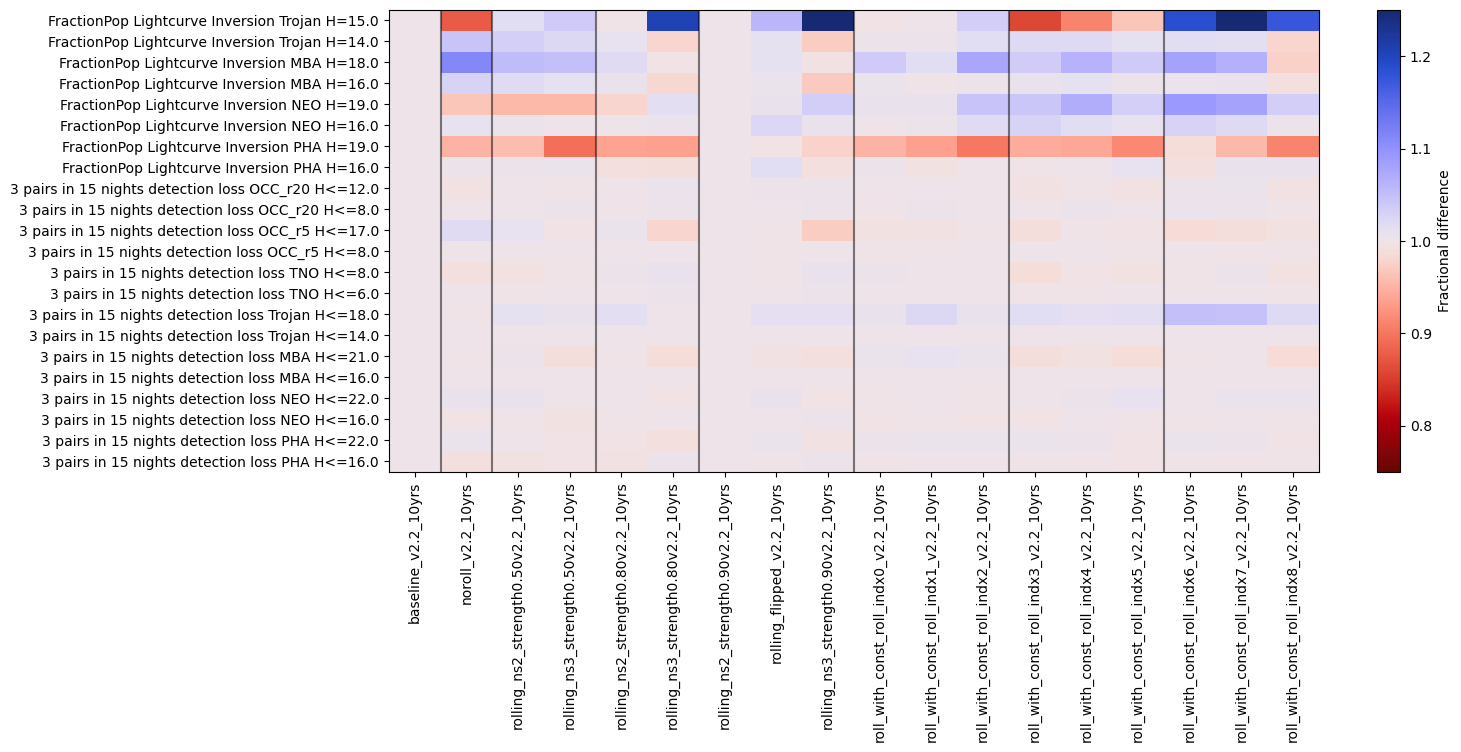

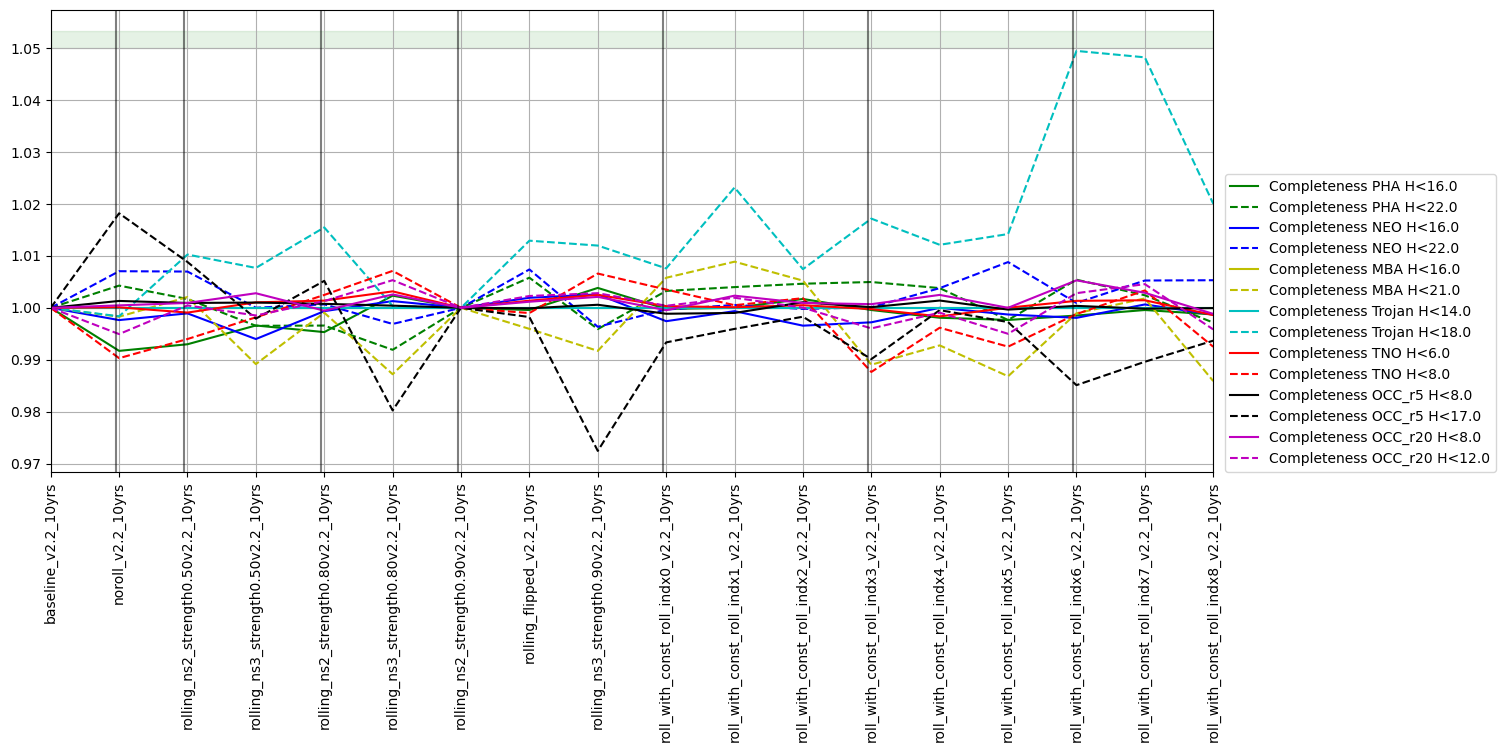

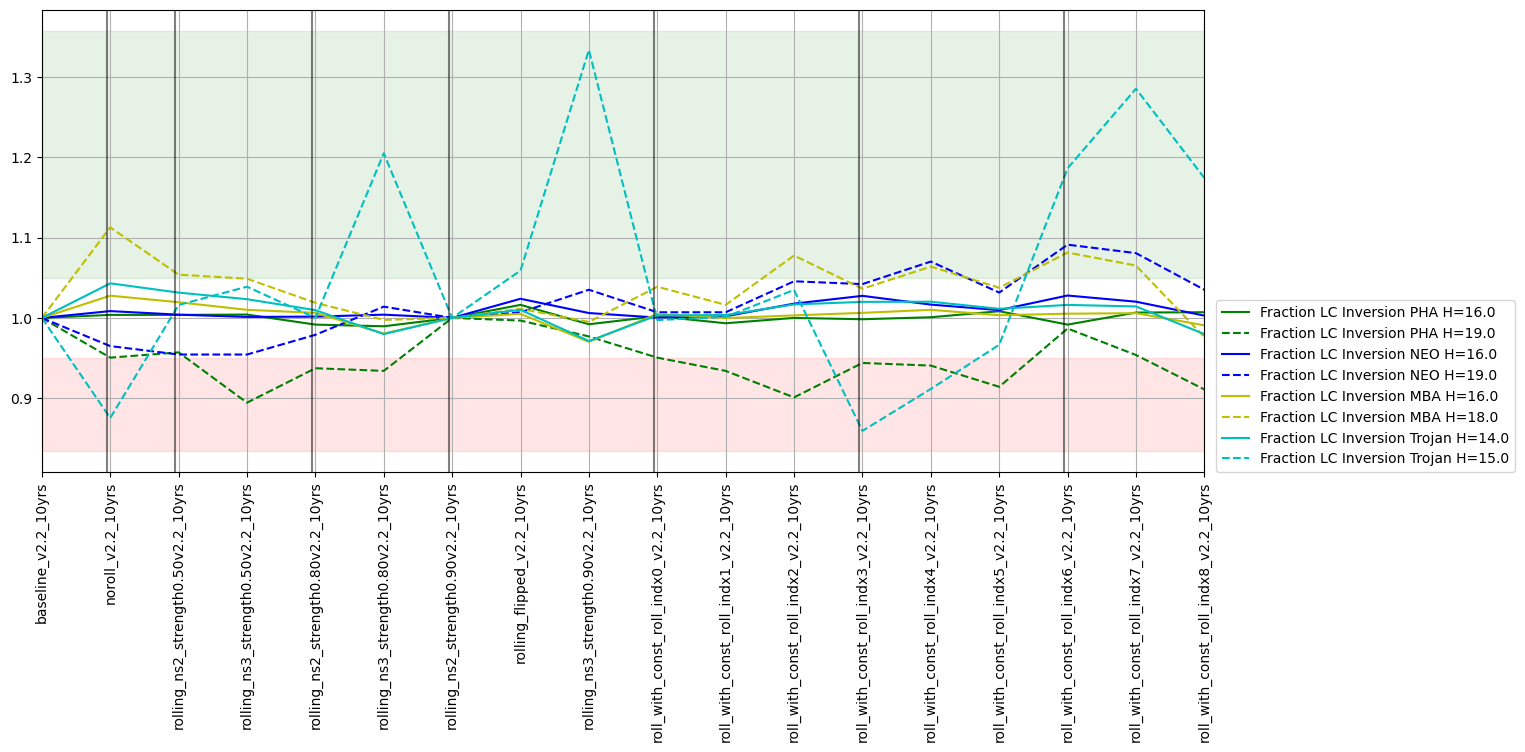

In [11]:
# sso metrics
k_sets = ['SSO discovery', 'SSO lightcurve inversion']

msub = metric_set.loc[k_sets].reset_index('metric set')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=0.5)
fig.set_figwidth(15)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

for k in k_sets:
    print(k)
    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)


The solar system metrics are extensive, but a summary set is represented here for completeness. The highest priority metrics include the discovery completeness and lightcurve inversion metrics; within these metrics, the results for Jovian Trojans are downweighted (as they tend to be more volatile than other populations).

Most of the discovery metrics are fairly neutral over the various rolling cadence implementations, although PHA discovery takes a downturn at 3-band rolling cadence (potentially counterbalanced by the lightcurve inversion improvements, however discovery is the primary goal). It is likely that the improvement in Trojan discovery with some of the roll_const simulations due to a coincidence of higher coverage of the region of sky where they are primarily found at the same time at which they are the brightest / closest to Earth, but without further investigation this isn't certain. 

I think previous solar system collaboration recommendations on rolling cadence are consistent with the effects seen here, and so previous recommendations that most of these are 'ok' and against 3-band 0.9 strength rolling cadence hold up (the previous recommendation against 0.5 strength 2-band cadence was based on a decrease in trojan lightcurve inversion that doesn't seem to continue here .. most likely due to slight rearrangements in visit intervals, which may indicate 'noise' levels inherent the metric based on the population and variations in visit sequences). 

In [ ]:
# TVS metrics
k_sets = [k for k in msets if k.startswith('TVS') and (k.endswith('short') or ('Tgaps' in k) or ('anomalies' in k)) ]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value', 
                                 shade_fraction=0.1)
    fig.set_figwidth(15)
    ylim = list(ax.get_ylim())
    ax.set_ylim(max(0.2, ylim[0]), min(2, ylim[1]))
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

These are some key metrics, in terms of rolling cadence metrics, as they strongly depend on cadence (as well as footprint, to varying extent). There are also a lot of metrics, and further feedback from the TVS community will help set improved priorities for the various metrics. In general, the last set 'TVS short' attempts to pull out the particular metrics which have been both indicated as most important in each set and also vary the most strongly across simulations. 

There are multiple KNe metrics -- a KNePopMetric run on all Bulla model KNe lightcurves, which is primarily used for DESC science evaluation; a KNePopMetric run on a single model lightcurve that generally matches GW170817 for TVS science (both of these can be evaluated with a wide set of 'detection' criteria); and a PrestoKNePopMetric which evaluates the likelihood of determining if a given KNe (that generally matches the GW170817 light curve) could be identified within a sea of other transients given the observations of the object. While PrestoKnePopMetric_Sum_scoreS represents the total number of Kne that are likely to meet the probability threshold of being identified as KNe, the TVS community has tenatively indicated that the Total detected KnePopMetric run on a single population and identified using the 'ztfrest_simple' criteria likely more accurately represent the overall preferred survey strategy (in contrast to the configuration preferred by DESC, which looks for multiple color observations among a larger population and with less constraints on the timing of visits). Among the runs in this set, the TVS / DESC configurations for the KNePopMetric are almost opposites, but with most variation constrained within 10%. The PrestoKNE_scoreS metric shows a preference for the higher 'const indx' runs, where there are more years with rolling cadence compared to the baseline. 

Other 'population based' TVS metrics include TDE detection and XRB detection, again with various criteria, and microlensing detection, with a variety of crossing times as well as summary metrics. The highest priority versions of these are in the 'TVS short' set.

The preferred detection criteria for TDE detection is not clear at the moment (Igor Andreoni is checking on it), but previous work indicated 'a color including u (some_color_pu)' was preferred. This is the most stringent discovery crtieria and tends to be very noisy as only a very small fraction of events are detectable. The variations seen above don't show obvious trends with rolling cadence strength or bands or when constant (non-rolling) years are added, and seem likely to be essentially noise.

The best metric for XRBs is likewise the 'early detect' criteria. The mean number of observations per event is fairly constant unless strong rolling within the bulge region (six bands in the bulge) is added, but this same strategy strongly decreases (by 30%) the total number of XRBs detectable. These rolling cadence simulations did not add rolling cadence in the bulge, and the metric results are pretty neutral on these simulations.

Microlensing is simulated with a wide variety of crossing times, from 1-5 days up to >500 day timescales. At the longer timescales, we find very little variation in metric results across all simulations. At very short (<20 day) timescales, most simulations show big variations; in addition, microlensing TVS members have indicated these events are not their priority. The highest priority microlensing crossing times are 20-60 days and 200-500 days. Most of the variation we see is in the 20-30 day crossing time metrics. In this set of simulations, the rolling cadence was only implemented on the low-dust WFD area. The microlensing metrics indicate some preference against 3 band rolling and a small benefit from no rolling at all. 

The remainder of the TVS metrics include estimates of how well periodic stars could be detected (periodic detect) or monitored (periodic star modulation). Detection of periodicity changes very little across rolling cadence. 

The final metrics in this area include the 'TgapsPercent' metric, which looks at what fraction of revisits occur within 2-14 hours or around 1 day. In general, these metrics improve in bands other than u as the rolling cadence goes from 2 to 3 bands, however u band does fall in these tgaps values. My best guess is that most likely, the u band is repeating more visits inside the same night in 3-band rolling cadence, as the amount of sky available is smaller at any time and u band is already most time-constrained (these simulations did not have any suppress revisits added). 


In [ ]:
# GP footprint metrics
k_sets = [k for k in msets if k.startswith('GP') and 'filter' not in k]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.05, color='k', alpha=0.5)

These metrics represent an attempt to encapsulate general thoughts about preferred cadence in the galactic plane, specifically weighted by the galactic plane priority map, and represent them with metrics. The 'FootprintMetric' reflects how much (and how heavily weighted in the priority map) area that acquire at least X number of visits (X depends on Tau -- as Tau decreases, the number of visits increases; Tau=5 corresponds to 791 visits per pointing). As rolling decreases, it is clear that area within the dusty plane and bulge diamond receive slightly more visits per pointing and as rolling increases, the visits in this area start to fall below the threshold of 791 per pointing. It's not immediately obvious why this is the case, given that the overall number of visits per pointing is fairly constant, but area can quickly fall above or below thresholds around 800 visits per pointing.  (we saw this in the previous rolling cadence simulations an dit holds true here too). 

The SeasonGaps and VisitIntervals metrics are more meaningful in this context. The SeasonGaps show whether or not the seasons become slightly longer or shorter (depending on Tau). We see here that as rolling cadence strength increases, the length of (at least some) seasons becomes longer; in other metrics, we see that the median season length is unchanged, so this is likely the effect of rolling cadence slightly increasing the season length in active years. The VisitIntervals metric demonstrates whether the sampling of visits on timescales from 2 to 73 days changes significantly; interestingly, these values do not change much across different rolling cadence options. I suspect this is because the sampling in rolling cadence primarily focuses on the Tau=2 timescale; variations on timescales below 2 days do not affect the metric results. Most of the impact of rolling cadence is focused on moving revisits from around 4 nights down to around 2 nights, but there is a distribution of revisit times that likely softens the change in metric results. We do see an improvement of metric values for VisitIntervals at Tau=2, but it is only on the order of +/-2%.

Generally these metrics do not influence the decisions around rolling cadence outside of the bulge significantly, and these simulations did not include rolling cadence in the bulge (although there is an effect from rolling cadence in the areas in the plane priority map which are outside the 'galactic plane' region of the footprint). 

In [ ]:
# DESC metrics
k_sets = [k for k in msets if k.startswith('DESC') and not k.endswith('DDF')]

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)

    fig, ax = maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']], 
                                  baseline_run=baseline_run,
                                  metric_set=metric_set.loc[k],
                                  metric_label_map=metric_set.loc[k]['short_name'],
                                 horizontal_quantity='run',
                                 vertical_quantity='value')
    fig.set_figwidth(15)
    #ax.set_ylim(0.5, 1.5)
    lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')
    for l in lines:
        ax.axvline(l-0.1, color='k', alpha=0.5)

The majority of the DESC WFD metrics are related to static science, and as such, do not show strong changes with rolling cadence. The exceptions are the SN, SN-SL, and KNe (DESC version) metrics, and to some extent the RMS of the coadded i band depth. (note that the SN metrics in this plot are verified with DESC, although for the WFD we do run at a lower resolution than their preference). 

In general, these metrics show a preference against 3-band rolling cadence, in any form. There is a somewhat unexpected improvement in the total number of SN detected when extra rolling cadence years are added (unexpected because the same don't show a decrease with no-rolling), although the progression of the zlim limit is consistent (lower with no rolling, higher with extra 2-band rolling cadence years). (note that 'zlim' represents the z limit of the "complete sample" which is reported in the total SN number).  

In [ ]:
# Evaluate non-uniformity 

msub = metric_set.loc['DESC WFD'].query('metric.str.contains("year")', engine='python')
for year in np.arange(1, 10, 1):
    tag = 'year %d' % year
    metrics = [f"{m.split('year')[0]}{tag} HealpixSlicer" for m in msub['metric']]
    short_names = [f"{m} {tag}" for m in msub['short_name']]
    invert = msub['invert']
    mag = msub['mag']
    style = msub['style']
    if year == 1:
        mset = maf.create_metric_set_df(f'DESC WFD {tag}',  metrics, short_names, 
                                        style=style, invert=invert, mag=mag)
    else:
        mset = pd.concat([mset, maf.create_metric_set_df(f'DESC WFD {tag}',  metrics, short_names,
                                                        style=style, invert=invert, mag=mag)])
baseline_run = 'baseline_v2.2_10yrs'
these_runs = families.explode('run').loc['rolling v2', 'run'].values
if baseline_run not in these_runs:
    these_runs = np.concatenate([[baseline_run], these_runs])
for yr in np.arange(1, 10, 1):
    k = 'DESC WFD year %d' % yr
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, mset.loc[k]['metric']], 
            metric_set=mset.loc[k],
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=mset.loc[k]['short_name']
        )
    lgd = plt.legend(loc=(1.01, 0.2), fancybox=True, numpoints=1, fontsize='medium')
    figwidth = min(10, len(these_runs))
    figwidth = max(figwidth, 15)
    fig.set_figwidth(figwidth)

In [ ]:
# example numbers
summaries.loc[['baseline_v2.2_10yrs', 'roll_with_const_roll_indx6_v2.2_10yrs', 'noroll_v2.2_10yrs'], 
              [f"Rms ExgalM5_with_cuts i band non-DD year {y} HealpixSlicer" 
               for y in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]].T

Looking at DESC WFD static science metrics and the uniformity of the survey year/year with rolling cadence: 
The first year shows no changes relative to baseline, except for the simulations which add extra rolling cadence seasons early on. 

Mostly this shows a preference against 3 band rolling. There are likely some other preferences to dig out of this set, based on years that DESC are planning to make bigger data analysis, but I'm not entirely sure how to balance those aspects of these metrics. (DESC are also looking into this in their observing strategy group). 

In [ ]:
## high level across all 

k_sets = ['SCOC']

for k in k_sets:
    msub = metric_set.loc[k]
    fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                       baseline_run=baseline_run,
                                       metric_label_map=msub['short_name'],
                                       metric_set=msub,
                                      color_range=0.5)
    fig.set_figwidth(15)
    for l in lines:
        ax.axvline(l, color='k', alpha=0.5)


This high level set isn't intended to be exhaustive, but hopefully somewhat representative. There are definitely trades for/against various strategies, although in general 3-band rolling cadence has more 'slight negatives' here than the 2-band rolling cadence.

In [ ]:
# We can plot them all together, but need to remove duplicates
non_dd = [m for m in msets if 'DD' not in m]
msub = metric_set.loc[non_dd].reset_index(drop=True).drop('style', axis=1).drop('short_name', axis=1)
msub = msub.drop_duplicates().set_index('metric', drop=False, verify_integrity=True)
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=1)
fig.set_figwidth(13)
fig.set_figheight(60)
for l in lines:
    ax.axvline(l, color='k', alpha=0.5)

The plot above shows the set of all metrics currently identified as higher level metrics by the science collaborations (although again, still not all metrics that are calculated). 

In [ ]:
# There are some potential overlaps between rolling cadence and third visits or suppress revisits - so 
# add them all together here 

fams = ['rolling', 'rolling v2', 'triplets', 'suppress repeats']
baseline_run = 'baseline_v2.0_10yrs'
more_runs = np.concatenate([[baseline_run], families.explode('run').loc[fams, 'run']])
more_runs = [r for r in more_runs if not r.startswith('presto')]


# We can plot them all together, but need to remove duplicates
non_dd = [m for m in msets if 'DD' not in m]
msub = metric_set.loc[non_dd].reset_index(drop=True).drop('style', axis=1).drop('short_name', axis=1)
msub = msub.drop_duplicates().set_index('metric', drop=False, verify_integrity=True)
fig, ax = maf.plot_run_metric_mesh(summaries.loc[more_runs,msub['metric']], 
                                   baseline_run=baseline_run,
                                   #metric_label_map=msub['short_name'],
                                   metric_set=msub,
                                  color_range=1)
fig.set_figwidth(24)
fig.set_figheight(60)

In [ ]:
# compare 2-band 0.5, 0.8 and 0.9 weight to look for changes.

runs = [r for r in these_runs if 'ns2' in r]
baseline = runs[-1]

non_dd = [m for m in msets if 'DD' not in m]
msub = metric_set.loc[non_dd].reset_index(drop=True).drop('style', axis=1).drop('short_name', axis=1)
msub = msub.drop_duplicates().set_index('metric', drop=False, verify_integrity=True)
df = maf.normalize_metric_summaries(baseline_run=baseline,
                              summary=summaries.loc[runs,msub['metric']],
                               metric_sets = msub)
df = df.dropna(axis=1)
df

In [ ]:
#The changes are about as expected based on discussions under separate sc-area cells above. 
for k in df:
    if (df.loc[:, k] > 1.1).any():
        print(df.loc[:, k])
    if (df.loc[:, k] < 0.9).any():
        print(df.loc[:, k])